In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
    from google.colab import files
    uploaded = files.upload()

Saving bs1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv to bs1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv


In [3]:
df = pd.read_csv('bs1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.384050
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.698970
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.337242
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.045757
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.251812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10605,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.221849
10606,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.732828
10607,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.643974
10608,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.519993


In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10605,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10606,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10607,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10608,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = df.pIC50
Y

,pIC50
0,6.384050
1,8.698970
2,6.337242
3,5.045757
4,5.251812
...,...
10605,5.221849
10606,5.732828
10607,4.643974
10608,5.519993


In [7]:
X.shape

(10610, 881)

In [8]:
Y.shape

(10610,)

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(10610, 163)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((8488, 163), (8488,))

In [13]:
X_test.shape, Y_test.shape

((2122, 163), (2122,))

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.659237295648595

In [15]:
Y_pred = model.predict(X_test)

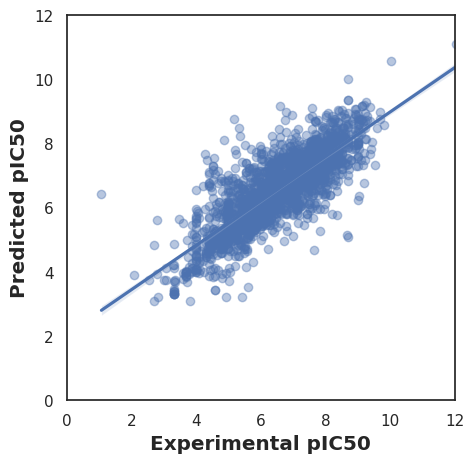

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('expt_pIC50_vs_pred_pIC50-1.png')

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions already done:
Y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


R² Score: 0.659237295648595
MSE: 0.6245857320869371
RMSE: 0.7903073655780624
MAE: 0.5711959684579274


In [18]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the model (Support Vector Regression)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(Y_test, y_pred)

# Error metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)

# Print results
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


R² Score: 0.616236475052262
MSE: 0.7034021596758062
RMSE: 0.8386907413795661
MAE: 0.6089871119850409


R² Score: 0.616236475052262
MSE: 0.7034021596758062
RMSE: 0.8386907413795661
MAE: 0.6089871119850409


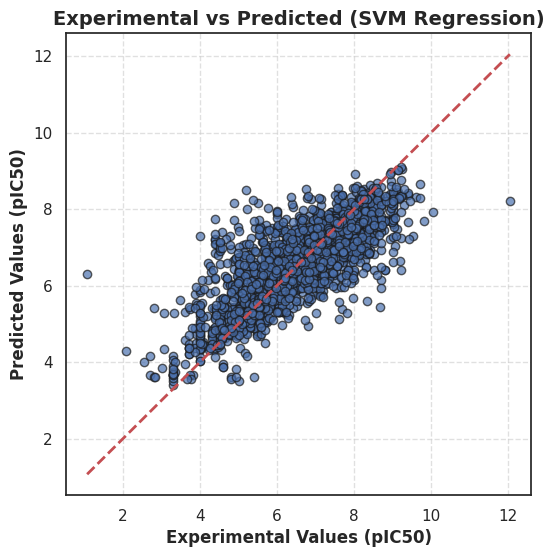

<Figure size 640x480 with 0 Axes>

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the model (Support Vector Regression)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(Y_test, y_pred)

# Error metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)

# Print results
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Plot Experimental vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # ideal line
plt.xlabel("Experimental Values (pIC50)", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Values (pIC50)", fontsize=12, fontweight='bold')
plt.title("Experimental vs Predicted (SVM Regression)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
plt.savefig('expt_pIC50_vs_pred_pIC50_SVR.png')

R² Score: 0.6575509208541004
MSE: 0.6276766972135263
RMSE: 0.792260498329638
MAE: 0.5719441316036111


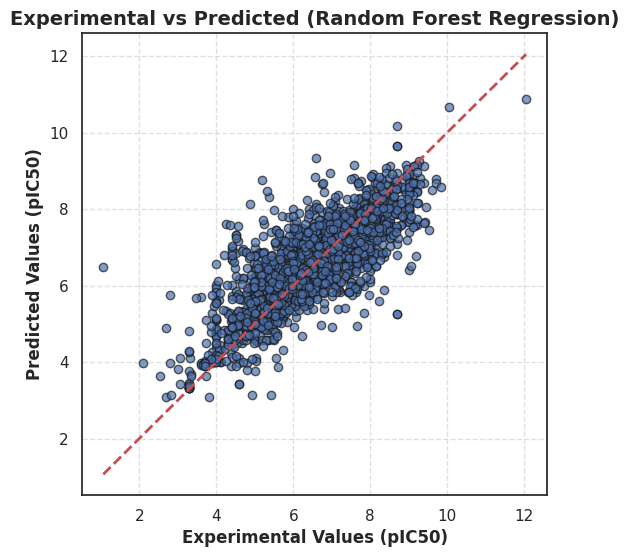

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the model (Random Forest Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(Y_test, y_pred)

# Error metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)

# Print results
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Plot Experimental vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # ideal line
plt.xlabel("Experimental Values (pIC50)", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Values (pIC50)", fontsize=12, fontweight='bold')
plt.title("Experimental vs Predicted (Random Forest Regression)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
#plt.savefig('expt_pIC50_vs_pred_pIC50_RF.png')
plt.savefig("rf_experimental_vs_predicted.pdf", dpi=300, bbox_inches="tight")

plt.show()

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       696
           1       0.88      0.93      0.90      1426

    accuracy                           0.86      2122
   macro avg       0.85      0.83      0.84      2122
weighted avg       0.86      0.86      0.86      2122

Confusion Matrix:
 [[ 513  183]
 [ 104 1322]]

SVM Performance:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       696
           1       0.85      0.93      0.89      1426

    accuracy                           0.85      2122
   macro avg       0.84      0.80      0.82      2122
weighted avg       0.84      0.85      0.84      2122

Confusion Matrix:
 [[ 471  225]
 [ 103 1323]]


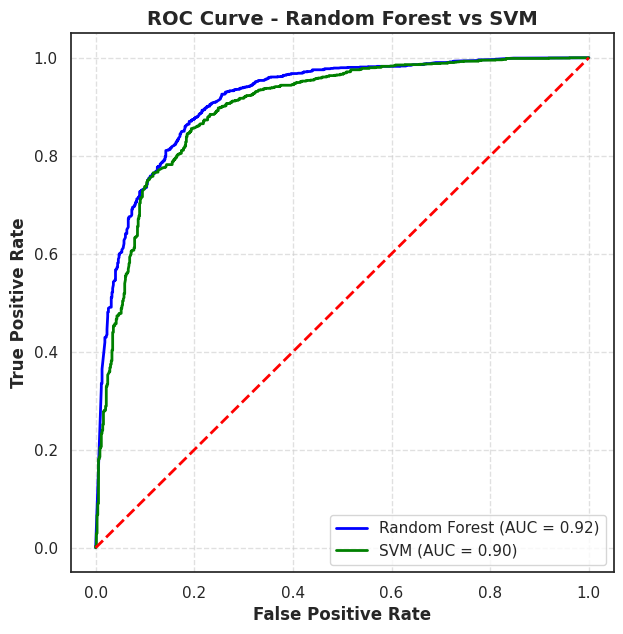

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize

# --------------------------
# 1. Define binary classes from pIC50
# --------------------------
# Example: threshold = 6.0 (active if >= 6)
threshold = 6.0
y_class = np.where(Y >= threshold, 1, 0)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# --------------------------
# 2. Train Random Forest Classifier
# --------------------------
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# --------------------------
# 3. Train SVM Classifier (with probability estimates)
# --------------------------
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# --------------------------
# 4. Model Performance Metrics
# --------------------------
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# --------------------------
# 5. ROC Curve and AUC
# --------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# --------------------------
# 6. Plot ROC Curve
# --------------------------
plt.figure(figsize=(7,7))
plt.plot(fpr_rf, tpr_rf, color="blue", lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, color="green", lw=2, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--")
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.title("ROC Curve - Random Forest vs SVM", fontsize=14, fontweight="bold")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
    from google.colab import files
    uploaded = files.upload()

Saving bioactivity_preprocessed_data.csv to bioactivity_preprocessed_data.csv


In [ ]:
mport joblib

# Save Random Forest
joblib.dump(rf_model, "rf_model.pkl")

# Save SVM
joblib.dump(svm_model, "svm_model.pkl")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")